Equipe:
*   Abdessamed Seddiki
*   Hind Ledra
*  Ines Bouais
*   Lydia Mouhoun
*   Mohammed Arab
*   Serine Gheddou
*   Elamine Selmane

Groupe : SIQ2

TP: AG / ACO

# Introduction
Ce Notebook comporte l'implémentation de 3 algorithmes de différentes approches pour résoudre le problème du Bin Packing (BPP), où l'objectif est de trouver la meilleure façon de répartir des objets de poids différents dans des conteneurs (bins) de même capacité afin de trouver le nombre de bins optimal à utiliser.

**PLAN**
1. Algorithmes Génétiques (AG)
2. Colonie de Fourmie avec construction (ACOc)
3. Colonie de Fourmie avec amélioration (ACOa)

# Implémentation des Algorithmes Génétiques (AG) : BPP

### Explication de la solution:

Cette solution est une implémentation d'un Algorithme Génétique (AG) avec élitisme pour le problème de bin packing, où des objets doivent être répartis dans des bacs de manière à minimiser le nombre total de bacs utilisés. Il commence par générer une population initiale de solutions aléatoires. Ensuite, il itère sur un certain nombre d'itérations, sélectionnant des parents par tournoi, puis produisant des enfants par croisement et mutation. La sélection élitiste garantit que les meilleurs individus de la population actuelle sont préservés. Les paramètres tels que la taille de la population, le nombre maximal d'itérations et la probabilité de sélection influent sur la performance de l'algorithme. Finalement, les résultats sont affichés sous forme de tableau et de graphique 3D pour analyser la relation entre ces paramètres et le nombre de bacs utilisés.

Population Size | Max Iterations | Selection Probability | Nombre de Bacs
-----------------------------------------------------------------------
10              | 30             | 0.3                    | 61             
10              | 30             | 0.8                    | 64             
10              | 30             | 0.99                   | 60             
10              | 50             | 0.3                    | 63             
10              | 50             | 0.8                    | 59             
10              | 50             | 0.99                   | 65             
10              | 500            | 0.3                    | 65             
10              | 500            | 0.8                    | 59             
10              | 500            | 0.99                   | 64             
20              | 30             | 0.3                    | 59             
20              | 30             | 0.8                    | 69             
20              | 

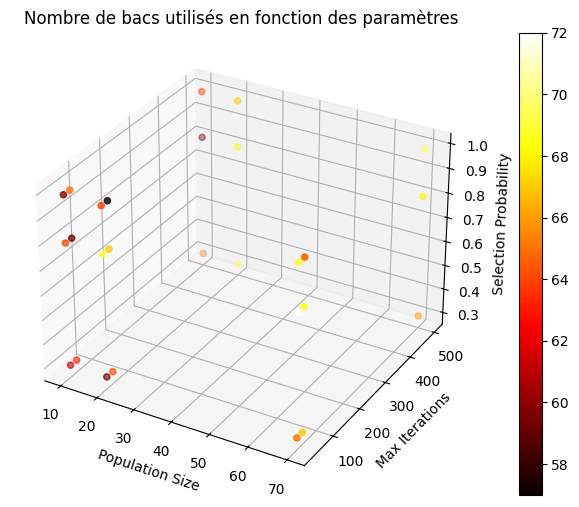

In [1]:
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class Individual:
    def __init__(self, solution, fitness):
        self.solution = solution  # La solution représente l'agencement des objets dans les bacs
        self.fitness = fitness    # La fitness représente la qualité de la solution, basée sur la somme des objets dans les bacs

# Générer une solution aléatoire
def generate_random_solution(items, num_bins, bin_capacity):
    solution = [[] for _ in range(num_bins)]  # Initialiser une liste de bacs vides
    for item in items:
        bin_idx = random.randint(0, num_bins - 1)  # Choisir un bac aléatoire
        solution[bin_idx].append(item)             # Ajouter l'objet au bac choisi
    return solution

# Fonction de fitness
def fitness_function(bin_contents, bin_capacity):
    return sum(sum(item) for item in bin_contents)  # Somme des objets dans tous les bacs

# Sélection par tournoi
def tournament_selection(population, tournament_size, selection_probability):
    selected = []
    while len(selected) < tournament_size:
        contestants = random.sample(population, tournament_size)  # Sélectionner des individus aléatoires
        winner = max(contestants, key=lambda x: x.fitness)        # Sélectionner le meilleur individu
        if random.random() < selection_probability:
            selected.append(winner)                               # Ajouter le gagnant à la liste des sélectionnés
    return selected

# Sélection élitiste
def elitist_selection(parents, children, population_size):
    combined_population = parents + children                     # Combinaison des parents et des enfants
    combined_population.sort(key=lambda x: x.fitness)            # Trier la population combinée par fitness croissante
    return combined_population[:population_size]                 # Retourner les 'population_size' meilleurs individus

# Croisement
def crossover(parent1, parent2):
    point1 = random.randint(1, len(parent1) - 1)                 # Point de croisement 1
    point2 = random.randint(point1, len(parent1) - 1)             # Point de croisement 2
    child = parent1[:point1] + parent2[point1:point2] + parent1[point2:]  # Croisement des parents
    return child

# Mutation
def mutation(child, bin_capacity):
    index = random.randint(0, len(child) - 1)                    # Choix aléatoire d'un bac
    child[index] = [random.randint(1, bin_capacity)]             # Mutation : remplacer les objets dans le bac choisi
    return child

# Algorithme génétique avec élitisme
def genetic_algorithm_with_elitism(items, num_bins, bin_capacity, population_size, max_iterations):
    population = [Individual(generate_random_solution(items, num_bins, bin_capacity), float('inf')) for _ in range(population_size)]  # Générer une population initiale aléatoire
    for _ in range(max_iterations):
        parents = tournament_selection(population, tournament_size, selection_probability)  # Sélection des parents par tournoi
        children = []
        for _ in range(population_size - 2):
            child = crossover(parents[0].solution, parents[1].solution)      # Croisement des parents
            if random.random() < 0.1:
                child = mutation(child, bin_capacity)                        # Mutation avec une faible probabilité
            children.append(Individual(child, fitness_function(child, bin_capacity)))  # Ajouter l'enfant à la liste des enfants
        population = elitist_selection(parents, children, population_size)      # Sélection élitiste des meilleurs individus
    best_solution = min(population, key=lambda x: x.fitness).solution          # Sélection de la meilleure solution
    return best_solution

# Lire les données à partir d'un fichier
def read_data_from_file(filename):
    with open(filename, 'r') as file:
        num_bins = int(file.readline().strip())                    # Nombre de bacs
        bin_capacity = int(file.readline().strip())                # Capacité des bacs
        items = []
        for line in file:
            items.extend(map(int, line.strip().split()))          # Ajouter les objets à la liste
        return num_bins, bin_capacity, items

if __name__ == "__main__":
    filename = "../benchmarks/benchmark100.txt"  # Nom du fichier d'entrée
    num_bins, bin_capacity, items = read_data_from_file(filename)  # Lire les données à partir du fichier

    tournament_size = 9                                            # Taille du tournoi pour la sélection

    population_sizes = [10, 20, 70]           # Tailles de la population
    max_iteration_values = [30, 50, 500]        # Valeurs maximales d'itérations
    selection_probabilities = [0.3, 0.8, 0.99] # Probabilités de sélection

    results = []  # Liste pour stocker les résultats

    for population_size in population_sizes:
        for max_iterations in max_iteration_values:
            for selection_probability in selection_probabilities:
                best_solution = genetic_algorithm_with_elitism(items, num_bins, bin_capacity, population_size, max_iterations)
                num_bins_best_solution = len([bin_contents for bin_contents in best_solution if bin_contents])
                results.append((population_size, max_iterations, selection_probability, num_bins_best_solution))

    print("Population Size | Max Iterations | Selection Probability | Nombre de Bacs")
    print("-----------------------------------------------------------------------")
    for result in results:
        print("{:<15} | {:<14} | {:<22} | {:<15}".format(*result))

    # Dessin du tableau 3D
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection='3d')

    x = [params[0] for params in results]
    y = [params[1] for params in results]
    z = [params[2] for params in results]
    c = [params[3] for params in results]

    img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
    fig.colorbar(img)
    ax.set_xlabel('Population Size')
    ax.set_ylabel('Max Iterations')
    ax.set_zlabel('Selection Probability')
    plt.title('Nombre de bacs utilisés en fonction des paramètres')
    plt.show()


# Implémentation de ACO avec construction (ACOc) : BPP
### Explication de la solution
L'algorithme d'optimisation par colonies de fourmis (ACO) pour le Problème de Bin Packing (BPP) fonctionne en imitant le comportement des fourmis lorsqu'elles cherchent la meilleure solution pour emballer des objets dans des bacs. Voici comment cela fonctionne :

1. **Initialisation des paramètres :** Tout d'abord, les paramètres de l'algorithme sont initialisés, y compris le nombre de fourmis, les taux d'évaporation et de dépôt de phéromones, ainsi que les facteurs d'importance pour le choix des objets.
2. **Construction de solutions :** Chaque fourmi construit une solution en sélectionnant itérativement des objets à emballer dans les bacs. La sélection est basée sur les niveaux de phéromones déposés par les objets et sur leurs poids respectifs. Les fourmis utilisent des règles probabilistes pour prendre leurs décisions.
3. **Évaluation des solutions :** Une fois qu'une fourmi a emballé tous les objets dans des bacs, la qualité de la solution est évaluée en comptant le nombre de bacs utilisés.
4. **Mise à jour des phéromones :** Les niveaux de phéromones sont mis à jour en fonction de la qualité de la solution. Les objets qui ont contribué à de bonnes solutions déposent davantage de phéromones, tandis que les niveaux de phéromones des objets qui ont contribué à de mauvaises solutions s'évaporent progressivement.
5.**Critère d'arrêt :** L'algorithme continue d'itérer à travers ces étapes jusqu'à ce qu'un critère d'arrêt soit atteint, tel qu'un nombre maximum d'itérations ou l'obtention d'une solution satisfaisante.


### Explication des hyperparamètres
* **num_items:** The number of items to be packed into bins.
* **bin_capacity:** The capacity of each bin. This determines the maximum weight that a bin can hold.
* **num_ants:** The number of ants in the colony. Each ant represents a potential solution to the problem.
* **alpha:** This parameter controls the influence of the pheromone trail on the ant's decision-making process. A higher alpha value gives more weight to the pheromone trail.
* **beta:** This parameter controls the influence of the heuristic information (e.g., the remaining capacity of bins) on the ant's decision-making process. A higher beta value gives more weight to the heuristic information.
* **rho:** The pheromone evaporation rate. It determines how fast the pheromone trail evaporates over time.
* **q:** A constant value used to update the pheromone trail when an ant finds a good solution. It influences the magnitude of the pheromone update.
* **max_iter:** The maximum number of iterations or generations for which the ACO algorithm will run before terminating. It controls the convergence of the algorithm and the total computational effort.

In [2]:
# Read input from the benchmark file
def read_input(file_path):
    with open(file_path, 'r') as file:
        num_objects = int(file.readline().strip())
        bin_capacity = int(file.readline().strip())
        weights = [int(line.strip()) for line in file]
    return num_objects, bin_capacity, weights

# Data upload
file_path = '../benchmarks/benchmark100.txt'
num_objects, bin_capacity, weights = read_input(file_path)



In [3]:
# Pheromone deposition, evaporation and perception

import numpy as np
import random
import copy

class Bin:
    def __init__(self, capacity):
        self.capacity = capacity
        self.items = []

    def remaining_capacity(self):
        return self.capacity - sum(self.items)

class Item:
    def __init__(self, weight):
        self.weight = weight
        self.pheromone = 1.0  # Initialize pheromone level for each item

class Ant:
    def __init__(self, bins, items, alpha, beta):
        self.bins = bins
        self.items = items
        self.alpha = alpha
        self.beta = beta

    def select_item(self):
        probabilities = []
        total_pheromone = sum([item.pheromone for item in self.items])
        for item in self.items:
            prob = (item.pheromone / total_pheromone) ** self.alpha * (1 / item.weight) ** self.beta
            probabilities.append(prob)
        probabilities = np.array(probabilities) / sum(probabilities)
        selected_index = np.random.choice(len(self.items), p=probabilities)
        return selected_index

    def pack_items(self):
        while self.items:
            selected_index = self.select_item()
            selected_item = self.items.pop(selected_index)
            packed = False
            for bin in self.bins:
                if bin.remaining_capacity() >= selected_item.weight:
                    bin.items.append(selected_item.weight)
                    selected_item.pheromone += 1  # Increase pheromone level on the selected item
                    packed = True
                    break
            if not packed:
                self.bins.append(Bin(bin_capacity))  # Create a new bin and pack the item


class ACO_BPP:
    def __init__(self, num_items, bin_capacity, num_ants, alpha, beta, rho, q, max_iter, weights):
        self.num_items = num_items
        self.bin_capacity = bin_capacity
        self.num_ants = num_ants
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.q = q
        self.max_iter = max_iter
        self.weights = weights  # Include weights from the benchmark

    def run(self):
        pheromones = np.ones(self.num_items)  # Initialize pheromones
        best_solution = None
        best_solution_bins = None
        best_num_bins = float('inf')

        for iteration in range(self.max_iter):
            ants = [Ant([Bin(self.bin_capacity)], [Item(weight) for weight in self.weights], self.alpha, self.beta) for _ in range(self.num_ants)]

            for ant in ants:
                ant.pack_items()

            for ant in ants:
                num_bins_used = len(ant.bins)
                if num_bins_used < best_num_bins:
                    best_num_bins = num_bins_used
                    best_solution = ant
                    #best_solution_bins = [bin.items for bin in ant.bins]
                                        # Make a deep copy of the list of bins
                    best_solution_bins = [copy.deepcopy(bin.items) for bin in ant.bins]

            # Evaporate pheromones
            for item in best_solution.items:
                item.pheromone *= (1 - self.rho)
                # Alternatively, you can evaporate pheromones for all items in all ants' items lists

            # Update pheromones based on the best solution found
            for item in best_solution.items:
                item.pheromone += self.q / num_bins_used  # Update pheromones

        return best_solution_bins


# Hyperparameters
num_ants = 10
alpha = 1
beta = 1
rho = 0.1
q = 1
max_iter = 100

# Run ACO algorithm
aco = ACO_BPP(num_objects, bin_capacity, num_ants, alpha, beta, rho, q, max_iter, weights)
best_solution_bins = aco.run()

print("Optimal nb bins: ", len(best_solution_bins))
print("Best solution bins:", best_solution_bins,"\n")


Optimal nb bins:  31
Best solution bins: [[33, 20, 26, 20], [65, 29], [47, 36], [56, 43], [36, 54], [41, 24, 28], [41, 47], [36, 23, 24], [44, 25, 26], [57, 20, 23], [31, 29, 27], [54, 44], [38, 20, 29], [54, 41], [65, 22], [46, 23, 28], [62, 34], [68, 30], [58, 35], [64, 30], [47, 52], [49, 26, 25], [53, 26], [65, 30], [53, 43], [51, 36], [63], [58, 40], [59, 38], [68], [52, 46]] 



#Implémentation de ACO avec amélioration (ACCa):BPP
###Explication de la solution:
Ce code implémente un algorithme d'optimisation par colonie de fourmis (ACO, Ant Colony Optimization) pour résoudre le problème du bin-packing. Le principe résout sur le fait de commencer par un certain nombre de bin initialement et puis améliorer cette solution itérativement à travers :

1. La fonction `ACO` prend en entrée le nombre de conteneurs, la liste des poids des objets, le nombre de chemins de fourmis, le taux d'évaporation des phéromones, le nombre d'évaluations de fitness et le nombre d'essais.

2. Pour chaque essai, des phéromones aléatoires sont initialisées sur tous les chemins possibles.

3. Ensuite, pour un certain nombre d'évaluations de fitness, les chemins des fourmis sont simulés :
   - La fonction `navigate_path` détermine le chemin d'une fourmi en se basant sur les probabilités calculées à partir des phéromones.
   - La fitness de chaque chemin est calculée comme la différence entre le poids maximum et minimum des conteneurs.

4. Après chaque évaluation de fitness, les phéromones sont mises à jour :
   - Les chemins les plus courts (meilleure fitness) reçoivent plus de phéromones.
   - Les phéromones s'évaporent progressivement avec un certain taux (fonction `evaporate`).

5. Après tous les essais, le meilleur chemin (fitness minimale) est retourné.

Les fonctions supplémentaires sont :

- `navigate_path` : Simule le chemin d'une fourmi en choisissant les conteneurs en fonction des probabilités calculées à partir des phéromones.
- `evaporate` : Applique le taux d'évaporation sur les phéromones de chaque chemin.

In [4]:
import random as rn
import numpy as np
import time

def ACO(bins, items, paths, evap_rate, fitness_evals, trials):
    '''
    Algorithme d'optimisation par colonie de fourmis pour trouver la meilleure fitness pour le problème du bin-packing.
    La fitness est calculée comme la différence entre le conteneur le plus lourd et le plus léger.

    Args:
    bins (int) : Nombre de conteneurs
    items (list(int)) : Liste des poids des objets
    paths (int): Nombre de chemins de fourmis
    evap_rate (float) : Taux d'évaporation des phéromones
    fitness_evals (int) : Nombre d'évaluations de fitness par essai
    trials (int): Nombre d'essais

    Returns:
    La meilleure fitness trouvée lors de la dernière évaluation à travers tous les essais.
    '''

    # Enregistrer la meilleure fitness globale trouvée jusqu'à présent
    best_fitness_across_trials = float('inf')  # Initialiser avec l'infini positif

    for trial in range(trials):
        start_time = time.time()

        # Définir une graine aléatoire unique pour chaque essai
        rn.seed(rn.randint(1, 10000))

        # Créer des phéromones aléatoires pour chaque chemin
        pheromone_paths = [[rn.uniform(0, 1) for i in range(len(items))] for x in range(bins)]

        # Déterminer le nombre de fois pour effectuer les évaluations en fonction du nombre de chemins
        runs = int(fitness_evals / paths)

        for each_run in range(runs):
            fitness_list = []
            path_list = []

            for path in range(paths):
                # Simuler le chemin d'une fourmi
                path = navigate_path(items, pheromone_paths, bins)
                path_list.append(path)

                # Obtenir les poids des conteneurs
                bin_list = [0 for y in range(bins)]

                for i in range(len(path)):
                    bin_list[path[i]] += items[i]

                # Calculer la fitness du chemin individuel
                fitness_list.append(max(bin_list) - min(bin_list))

            # Mettre à jour les phéromones pour les chemins
            current_path = 0

            for path in path_list:
                current_path_node = 0

                # Calculer la fitness globale du chemin
                pheromone_update = (100 / fitness_list[current_path])

                # Mettre à jour le chemin des phéromones
                for each_choice in path:
                    pheromone_paths[each_choice][current_path_node] += pheromone_update
                    current_path_node += 1

                current_path += 1

                each_run += 1

            # Évaporer les phéromones
            pheromone_paths = evaporate(pheromone_paths, evap_rate)

        # Mettre à jour la meilleure fitness globale si une meilleure fitness est trouvée
        if min(fitness_list) < best_fitness_across_trials:
            best_fitness_across_trials = min(fitness_list)

        end_time = time.time()  # Enregistrer le temps de fin de l'essai
        trial_time = end_time - start_time  # Calculer le temps pris pour l'essai

        # Afficher la meilleure fitness et le temps pris pour l'essai
        print(f"Essai {trial + 1} - Meilleure fitness: {best_fitness_across_trials} - Temps pris: {trial_time:.4f} secondes")

    print(bin_list)
    return best_fitness_across_trials


def navigate_path(items, pheromones, bins):
    '''
    Fonction pour naviguer dans les chemins en se basant sur les phéromones.

    Args:
    items (list(int)): Liste des poids des objets
    pheromones (list(list(int))) : Liste des phéromones sur les chemins
    bins (int) : Nombre de conteneurs

    Returns:
    Le chemin emprunté par la fourmi lors de la navigation à travers les conteneurs
    '''

    path = []

    # Itérer et placer les objets dans les conteneurs
    for each_item in range(len(items)):
        # Récupérer la probabilité pour le prochain conteneur
        bin_prob = [bin_prob[each_item] for bin_prob in pheromones]

        choice = rn.uniform(0, sum(bin_prob))
        cumulative_prob = 0

        # Choisir le conteneur en fonction de la probabilité
        for bin_prob_index in range(len(bin_prob)):
            cumulative_prob += bin_prob[bin_prob_index]

            if choice <= cumulative_prob:
                path.append(bin_prob_index)
                break

    return path


def evaporate(pheromones, evap_rate):
    '''
    Évaporer toutes les phéromones sur les chemins

    Args:
    pheromones (list(list(int))) : Liste des phéromones à mettre à jour
    evap_rate (float) : Taux d'évaporation

    Returns:
    Les phéromones mises à jour par le taux d'évaporation.
    '''
    return [[x * evap_rate for x in row] for row in pheromones]

if __name__ == "__main__":
    trials_per_experiment = 5  # Number of trials per experiment

    print("BPP1: Experiment 1")
    print(ACO(10, [i * 2 for i in range(500)], 100, 0.90, 10000, trials_per_experiment))

    print("BPP1: Experiment 2")
    print(ACO(10, [i * 2 for i in range(500)], 100, 0.50, 10000, trials_per_experiment))

    print("BPP1: Experiment 3")
    print(ACO(10, [i * 2 for i in range(500)], 10, 0.90, 10000, trials_per_experiment))

    print("BPP1: Experiment 4")
    print(ACO(10, [i * 2 for i in range(500)], 10, 0.50, 10000, trials_per_experiment))

BPP1: Experiment 1
Essai 1 - Meilleure fitness: 5070 - Temps pris: 13.4822 secondes
Essai 2 - Meilleure fitness: 5070 - Temps pris: 10.4556 secondes
Essai 3 - Meilleure fitness: 5070 - Temps pris: 12.8446 secondes
Essai 4 - Meilleure fitness: 5070 - Temps pris: 16.7929 secondes
Essai 5 - Meilleure fitness: 4358 - Temps pris: 12.3322 secondes
[20368, 26686, 27388, 31998, 22548, 19948, 27240, 21668, 28698, 22958]
4358
BPP1: Experiment 2
Essai 1 - Meilleure fitness: 5754 - Temps pris: 10.8812 secondes
Essai 2 - Meilleure fitness: 4852 - Temps pris: 13.7088 secondes


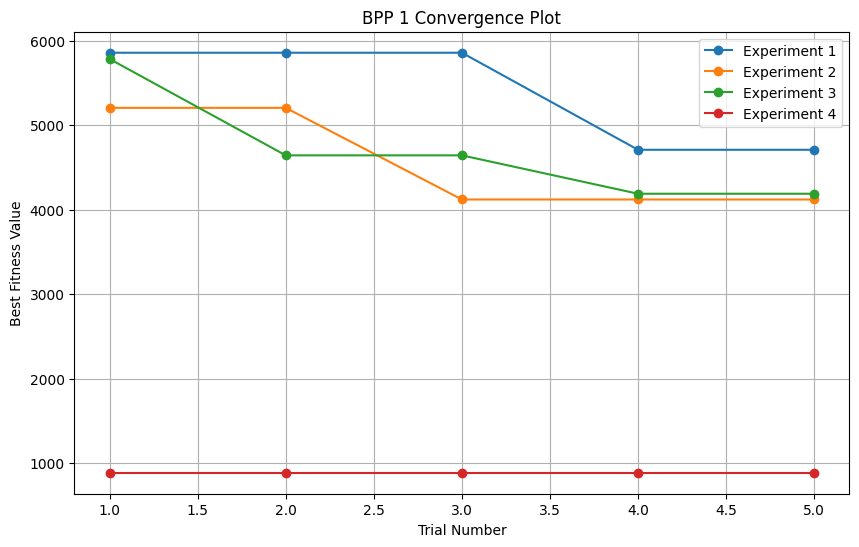

In [ ]:
import matplotlib.pyplot as plt

def convergence_plot(experiment_results):
    plt.figure(figsize=(10, 6))

    for experiment_num, best_fitness_per_trial in enumerate(experiment_results, start=1):
        plt.plot(range(1, len(best_fitness_per_trial) + 1), best_fitness_per_trial, marker='o', label=f'Experiment {experiment_num}')

    plt.xlabel('Trial Number')
    plt.ylabel('Best Fitness Value')
    plt.title('BPP 1 Convergence Plot')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage:
experiment1_results = [5856,5856,5856,4708,4708]
experiment2_results = [5204,5204,4120,4120,4120]
experiment3_results = [5782,4642,4642,4188,4188]
experiment4_results = [888,888,888,888,888]

all_experiment_results = [experiment1_results, experiment2_results, experiment3_results, experiment4_results]

convergence_plot(all_experiment_results)

# Conclusion
Les **algorithmes génétiques** sont réputés pour leur rapidité et leur performance dans la résolution du problème du bin packing. Ils parviennent souvent à trouver des solutions de qualité en un temps d'exécution relativement court. La précision de leurs solutions est généralement élevée, bien que cela nécessite parfois un ajustement minutieux des paramètres. La difficulté de paramétrage est modérée, ce qui en fait une option attrayante pour de nombreux cas d'utilisation. Globalement, les algorithmes génétiques offrent un équilibre satisfaisant entre vitesse d'exécution, qualité des solutions et facilité de mise en œuvre.

En revanche, l'approche basée sur l'**ACO avec construction** est plus simple à mettre en place mais moins performante en termes de qualité des solutions. Bien qu'elle puisse fournir des solutions acceptables pour des problèmes de petite à moyenne taille, elle ne rivalise pas avec les algorithmes génétiques en termes de précision. Cependant, sa facilité de paramétrage et son temps d'exécution généralement plus court en font une option attrayante pour les applications où la performance absolue n'est pas primordiale.

Enfin, l'utilisation de l'**ACO avec amélioration** peut être justifiée lorsque des solutions de très haute qualité sont nécessaires. Cependant, cette approche est très coûteuse en termes de temps d'exécution en raison de la phase d'amélioration supplémentaire. Bien qu'elle puisse potentiellement fournir des solutions de meilleure qualité que les autres méthodes, cela se fait au prix d'un temps d'exécution considérablement plus long et d'une complexité accrue dans le réglage des paramètres. Ainsi, le choix entre ces méthodes dépendra des exigences spécifiques du problème, en tenant compte des compromis entre qualité de la solution, temps d'exécution et complexité de mise en œuvre.


In [ ]:
# Données à afficher dans le tableau
data = [
    ["Méthode", "Coût", "Performance", "Précision", "Difficulté de paramétrage"],
    ["","","","",""],
    ["Algorithmes génétiques", "Rapide", "Performant", "Élevée", "Modérée"],
    ["ACO avec construction", "Moins coûteux", "Moins performant", "Acceptable", "Faible"],
    ["ACO avec amélioration", "Très coûteux", "Potentiellement meilleure", "Potentiellement meilleure", "Élevée"]
]

# Fonction pour afficher le tableau
def print_table(data):
    col_widths = [max(len(str(item)) for item in col) for col in zip(*data)]
    for row in data:
        print(" | ".join(str(item).ljust(width) for item, width in zip(row, col_widths)))

# Affichage du tableau
print_table(data)


Méthode                | Coût          | Performance               | Précision                 | Difficulté de paramétrage
                       |               |                           |                           |                          
Algorithmes génétiques | Rapide        | Performant                | Élevée                    | Modérée                  
ACO avec construction  | Moins coûteux | Moins performant          | Acceptable                | Faible                   
ACO avec amélioration  | Très coûteux  | Potentiellement meilleure | Potentiellement meilleure | Élevée                   


En conclusion, le choix entre ces méthodes dépendra des compromis à faire entre la qualité de la solution, le temps d'exécution et la complexité de mise en œuvre. Les algorithmes génétiques offrent souvent le meilleur équilibre entre rapidité et qualité des solutions, tandis que l'ACO avec amélioration peut être utile pour des problèmes nécessitant une précision maximale, malgré son coût en temps. L'ACO avec construction, bien que moins performant, est simple à mettre en œuvre et peut être suffisant pour des problèmes de taille modérée.